# ch11_ 데이터프레임과  시리즈(Pandas)_9-13절

In [2]:
from statsmodels.api import datasets
iris=datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


# 9.1 groupby
cf.pivot_table

In [4]:
# 1 그룹화 방법1
#   df.groupby(by=[그룹핑할 열]) [[함수적용해서 출력할 열들]].기초통계함수()
    # [[함수적용해서 출력할 열들]] 생략시 모든 열 적용
iris_grouped=iris.groupby(by='Species')
iris_grouped=iris.groupby(by=iris.Species)
list(iris_grouped)

[('setosa',
      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
  0            5.1          3.5           1.4          0.2  setosa
  1            4.9          3.0           1.4          0.2  setosa
  2            4.7          3.2           1.3          0.2  setosa
  3            4.6          3.1           1.5          0.2  setosa
  4            5.0          3.6           1.4          0.2  setosa
  5            5.4          3.9           1.7          0.4  setosa
  6            4.6          3.4           1.4          0.3  setosa
  7            5.0          3.4           1.5          0.2  setosa
  8            4.4          2.9           1.4          0.2  setosa
  9            4.9          3.1           1.5          0.1  setosa
  10           5.4          3.7           1.5          0.2  setosa
  11           4.8          3.4           1.6          0.2  setosa
  12           4.8          3.0           1.4          0.1  setosa
  13           4.3          3.0           1.1     

In [9]:
# 1) 그룹화 방법1
#    df.grauby(by=[그룹핑할 열])[[함수적용하여 출력할 열들]].기초통계함수()
    # [[함수적용하여 출력할 열들]] 생략시 모든열에 적용됨

iris_grouped = iris.groupby(by='Species')

iris_grouped = iris.groupby(by=iris.Species)
iris_grouped_sum = iris_grouped.sum()

iris_grouped_sum 

iris.groupby(by='Species')[['Sepal.Length' , 'Sepal.Width']].sum() # 두가지만 출력

iris.groupby(by='Species') # 전부다 출력

In [10]:
# setosa와 virginica의 종별 합
iris_grouped_sum .loc[['setosa' ,'virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [12]:
iris_grouped_sum.reset_index(inplace=True)
iris_grouped_sum

,index,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,setosa,250.3,171.4,73.1,12.3
1,1,versicolor,296.8,138.5,213.0,66.3
2,2,virginica,329.4,148.7,277.6,101.3


In [13]:
# 
iris_grouped_sum[(iris_grouped_sum['Species']=='setosa')|
                (iris_grouped_sum['Species']=='virginica')]

,index,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,setosa,250.3,171.4,73.1,12.3
2,2,virginica,329.4,148.7,277.6,101.3


In [14]:
iris_grouped_sum[iris_grouped_sum['Species'].isin(['setosa' ,'virfinica'])]

,index,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,setosa,250.3,171.4,73.1,12.3


In [15]:
# 1) 그룹화 방법1-1 : 그룹핑할때 index를 컬럼으로 편입
#    df.grauby(by=[그룹핑할 열])[[함수적용하여 출력할 열들]].기초통계함수()
    # [[함수적용하여 출력할 열들]] 생략시 모든열에 적용됨

iris.groupby('Species', as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [ ]:
# 1) 그룹화 방법1 : 그룹핑할때 index를 컬럼으로 편입
#    df.grauby(by=[그룹핑할 열])[[함수적용하여 출력할 열들]].기초통계함수()
    # [[함수적용하여 출력할 열들]] 생략시 모든열에 적용됨
# 2) 그룹화 방법2:
    #df.pivot_table(index='그룹화할 열' ,
                    # values=[함수적용해서 출력할 열들],
                    # aggfunc='sum') 
                    #

In [17]:
iris.pivot_table(index='Species',
                aggfunc='sum')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,73.1,12.3,250.3,171.4
versicolor,213.0,66.3,296.8,138.5
virginica,277.6,101.3,329.4,148.7


In [16]:
iris.pivot table?

Object `table` not found.


In [18]:
iris.pivot_table(index='Species',
                 values='Sepal.Length',
                 aggfunc='count')

,Sepal.Length
Species,
setosa,50
versicolor,50
virginica,50


In [19]:
iris.pivot_table(index='Species',
                 #values='Sepal.Length',
                 aggfunc='count')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


## 다중열 그룹화

In [20]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
iris.iloc[::5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
20,5.4,3.4,1.7,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
45,4.8,3.0,1.4,0.3,setosa


In [24]:
# iris를 다중열로 그룹화하기 위해 데이터 추가(num 필드)
# 0-25, 1-25개, 2-25개, 3-25개, 4-25개, 5-25개
import numpy as np
np.array([[i]*25 for i in range(6)]).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [25]:
iris['num'] = np.array([[i]*25 for i in range(6)]).ravel()
iris.tail(0)

iris.iloc[::25]
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [27]:
# Species별 num별 합계
r=iris.groupby(by=['Species','num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         87.0          36.5          6.2
           1           124.6         84.4          36.6          6.1
versicolor 2           150.3         69.4         107.8         33.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         141.0         51.1
           5           165.0         75.5         136.6         50.2

In [28]:
r.loc[['setosa','virginica']]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         141.0         51.1
          5           165.0         75.5         136.6         50.2

In [29]:
r.loc[[('setosa,0'),('virginica',4)]]

KeyError: "['setosa,0' ('virginica', 4)] not in index"

In [30]:

iris.groupby(by=['Species','num'],
             as_index=False)[['Sepal.Length','Sepal.Width']].sum()

,Species,num,Sepal.Length,Sepal.Width
0,setosa,0,125.7,87.0
1,setosa,1,124.6,84.4
2,versicolor,2,150.3,69.4
3,versicolor,3,146.5,69.1
4,virginica,4,164.4,73.2
5,virginica,5,165.0,75.5


In [31]:
r.loc[['setosa' , 'virginica']]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         141.0         51.1
          5           165.0         75.5         136.6         50.2

In [32]:
r.loc[[('setosa' ,0) , ('virginica' ,4)]]

,,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,num,,,,
setosa,0,125.7,87.0,36.5,6.2
virginica,4,164.4,73.2,141.0,51.1


In [33]:
# Species별 , num별 합계(그룹핑할 열을 컬럼 데이터로)

iris.groupby(by=['Species' , 'num'],
             as_index=False)[['Sepal.Length' ,'Sepal.Width']].sum()

,Species,num,Sepal.Length,Sepal.Width
0,setosa,0,125.7,87.0
1,setosa,1,124.6,84.4
2,versicolor,2,150.3,69.4
3,versicolor,3,146.5,69.1
4,virginica,4,164.4,73.2
5,virginica,5,165.0,75.5


In [34]:
iris.pivot_table(index=['Species' ,'num'],
                values=['Sepal.Length' ,'Sepal.Width'] ,
                aggfunc='sum')

Sepal.Length  Sepal.Width
Species    num                           
setosa     0           125.7         87.0
           1           124.6         84.4
versicolor 2           150.3         69.4
           3           146.5         69.1
virginica  4           164.4         73.2
           5           165.0         75.5

In [35]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.500000
std,0.828066,0.435866,1.765298,0.762238,1.713547
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.500000
75%,6.400000,3.300000,5.100000,1.800000,4.000000
max,7.900000,4.400000,6.900000,2.500000,5.000000


In [38]:
iris.groupby('Species')[['Sepal.Length' ,
                          'Sepal.Width' ,
                          'Petal.Length' ,
                          'Petal.Width']].describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [39]:
g = iris.groupby('Species')[['Sepal.Length' ,
                          'Sepal.Width' ,
                          'Petal.Length' ,
                          'Petal.Width']].sum()

g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


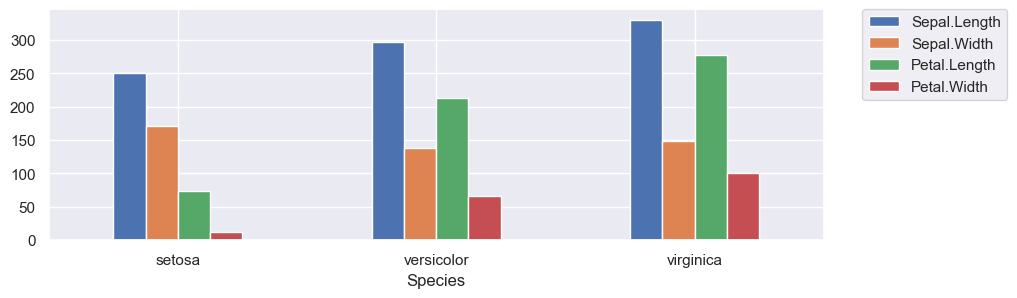

In [44]:
import matplotlib.pyplot as plt
g.plot(kind='bar',figsize=(10,3),rot=0)
# 법례를 밖으로
plt.legend(bbox_to_anchor=(1.05 ,1) , loc=2 , borderaxespad=0.)
plt.show()

https://stackoverflow.com/questi
ons/30490740/move legend
outside figure in seaborn tsplot :
범례사용(시각화 20쪽)

## 9.2 그룹간 데이터 처리

In [45]:
iris_grouped=iris.groupby('Species')
iris_grouped

In [47]:

for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.head(3))

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


In [48]:
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.sample(3).sort_index())

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
11,4.8,3.4,1.6,0.2,setosa,0
12,4.8,3.0,1.4,0.1,setosa,0
31,5.4,3.4,1.5,0.4,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
66,5.6,3.0,4.5,1.5,versicolor,2
73,6.1,2.8,4.7,1.2,versicolor,2
99,5.7,2.8,4.1,1.3,versicolor,3


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
110,6.5,3.2,5.1,2.0,virginica,4
135,7.7,3.0,6.1,2.3,virginica,5
149,5.9,3.0,5.1,1.8,virginica,5


In [49]:
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.iloc[[0,10,20,30,40]])

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터프레임 그룹 인덱싱
- 종별, 0, 10, 20, 30, 30번째 추출

In [50]:
iris.groupby('Species').take([0,10,20,30,40])

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

# 10절 데이터 구조 변경
-와이드포맷<->롱포맷
-판다스 공식 문서ㅡ

In [52]:
airquality = datasets.get_rdataset('airquality').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.1 melt를 이용한 언피벗팅(와이드포맷->롱포맷)

In [55]:
airquality.melt(id_vars=['Month','Day']).sort_values(by=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


In [56]:
airquality.melt(id_vars=['Month' , 'Day'],
               var_name='변수명' , 
               value_name='값').sort_values(by=['Month' ,'Day'])

,Month,Day,변수명,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


In [57]:
airquality_melted = airquality.melt(id_vars=['Month' , 'Day'],
               var_name='변수명' , 
               value_name='값').sort_values(by=['Month' ,'Day'])

airquality_melted.reset_index(drop=True , inplace=True)
airquality_melted

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


## 10.2 pivot_ta

In [58]:
airquality_melted.pivot_table(index=['Month', 'Day'],
                             columns='변수명',
                             values='값')

변수명        Ozone  Solar.R  Temp  Wind
Month Day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3
...          ...      ...   ...   ...
9     26    30.0    193.0  70.0   6.9
      27     NaN    145.0  77.0  13.2
      28    14.0    191.0  75.0  14.3
      29    18.0    131.0  76.0   8.0
      30    20.0    223.0  68.0  11.5

[153 rows x 4 columns]

In [59]:
airquality2=airquality_melted.pivot_table(index=['Month', 'Day'],
                             columns='변수명',
                             values='값')
airquality2.head()

변수명        Ozone  Solar.R  Temp  Wind
Month Day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3

In [60]:
airquality2=airquality_melted.pivot_table(index=['Month', 'Day'],
                             columns='변수명',
                             values='값')
airquality2.reset_index()

변수명,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [61]:
airquality2=airquality_melted.pivot_table(index=['Month', 'Day'],
                             columns='변수명',
                             values='값')
airquality2=airquality_melted.pivot_table(index=['Month', 'Day'],
                             columns='변수명',
                             values='값')
airquality2.reset_index(inplace=True)

In [62]:
airquality2.columns.name=None
airquality2.head()

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


# 11절 데이터프레임에 함수 적용시키기
-apply(func,axis): (데이터프레임이나 시리즈 모두 적용 가능)
-applymap(func): 각 요소별로 적용(데이터프레임에서만 가능)
-map(func):각 요소별로 적용(1차원 시리즈에서만 가능)
## 11. apply

In [63]:
# ex1. 1차원 시리즈에 apply 사용
import pandas as pd
member=pd.read_csv('data/ch11_member.csv',comment='#')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [67]:
# 1999-01-30 문자를 1999숫자로 return
def parse_year(datestr):
    return int(datestr.split('-')[0])
parse_year("1999-01-30")

1999

In [68]:
# 1999-01-30 문자를 1999숫자로 return
def parse_year(datestr):
    return int(datestr.split('-')[1])
parse_year=lambda datestr:int(datestr.split('-')[1])
parse_year("1999-01-30")

1

In [70]:
member['Birth'].apply(lambda datestr : int(datestr.split('-')[0]))


0    1999
1    1999
2    1999
3    1999
4    1999
Name: Birth, dtype: int64

In [71]:
member['년'] = member['Birth'].apply(lambda datestr : int(datestr.split('-')[0]))

member

,Name,Age,Email,Address,Birth,년
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999


In [72]:
member['Birth']

0    1999-01-01
1    1999-12-01
2    1999-11-01
3    1999-05-01
4    1999-01-30
Name: Birth, dtype: object

In [73]:
member['년'] = member['Birth'].apply(lambda datestr : int(datestr.split('-')[0]))
member['월'] = member['Birth'].apply(lambda datestr : int(datestr.split('-')[1]))
member

,Name,Age,Email,Address,Birth,년,월
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999,1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999,12
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999,11
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999,5
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999,1


# ex2. 2차원  데이터프레임에 apply(func,axis) 사용
%ls ""

In [77]:
df_last=pd.read_csv(r'data\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv' , 
                   encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [78]:
row = df_last.iloc[0]
row

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [79]:
row.지역명 , row['지역명']

('서울', '서울')

In [85]:
def year_month(series):
    return str(series['연도'])+'년'+str(series['월'])+'월'
year_month(df_last.iloc[300])

'2016년1월'

In [90]:
df_last['연도월']=\
    df_last.apply(lambda series:str(series['연도'])+'년'+str(series['월'])+'월', axis=1)

df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60제곱미터이하,2015,10,5652,2015년10월
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,2015년10월
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,2015년10월
4,서울,전용면적 102제곱미터초과,2015,10,5879,2015년10월


## 11.2 applymap


In [91]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[: , :-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2


In [92]:
X.applymap(lambda x : x**2).head()

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04


In [93]:
import numpy as np
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


### ※ melt() 및 함수 적용하기 연습예제 (와이드포맷 -> 롱포멧 , pd.concat)
- 와이드포맷 ==> 롱포맷
- 2013년 12월 ==> 2023과 12나눠 '연도'와 '월'컬럼 (apply, map)
- 평당분양가격 /3.3, 컬럼명 조정=> new_first 
- df_last['규모구분']=='모든 면적' 추출==> new_last
- pd.concat([new_first,new_last])

In [96]:
# 2013년 ~2015년 8월(와이드 포맷)

df_first=pd.read_csv(r'data/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv' , 
                   encoding='cp949')
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [99]:
# 2013년~2015년 (와이드포맷)

df_first=pd.read_csv(r'data\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv' , 
                   encoding='cp949')
print(df_first.shape)
df_first.head(1)

(9095, 5)


,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [97]:
# 2015년 10월 ~2024년 (롱포맷드)

df_last=pd.read_csv(r'data\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv' , 
                   encoding='cp949')
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [98]:
# 2015년 10월 ~2024년 (롱포맷)

df_last=pd.read_csv(r'data\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv' , 
                   encoding='cp949')
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
